# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json


# Import API key
from config import weather_key
from config import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities, and countries
lat_lngs = []
cities = []
countries = []
la = []
long = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        la.append(lat_lng[0])
        long.append(lat_lng[1])
        
        
       


# Create a dataframe 
cities_pd = pd.DataFrame({"City" : cities})


cities_pd["Cloudiness"] = ""
cities_pd["Country"] = countries
cities_pd["Date"] = ""
cities_pd["Humidity"] = ""
cities_pd["Lat"] = la
cities_pd["Lng"] = long
cities_pd["Max Temp"] = ""
cities_pd["Wind Speed"] = ""




### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_key}&units={units}&q="

print("Beginning Data Retrieval")
print("--------------------------------")
for index, row in cities_pd.iterrows():
    
    city = row['City']
    response = requests.get(query_url + city).json()
    
    if response["cod"] == "404":
        print("City not found, skipping...")

    else:
        cities_pd.set_value(index, "Cloudiness", response["clouds"]["all"])
        cities_pd.set_value(index, "Date", response["dt"])
        cities_pd.set_value(index, "Humidity", response["main"]["humidity"])
        cities_pd.set_value(index, "Max Temp", response["main"]["temp_max"])
        cities_pd.set_value(index, "Wind Speed", response["wind"]["speed"])
        
        print("Processing record " + str(index) + " of Set 1 | " + city )
        print(query_url + city)
    
 



Beginning Data Retrieval
--------------------------------


C:\Users\helen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\helen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\helen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\helen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\helen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future rele

Processing record 0 of Set 1 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=carnarvon
Processing record 1 of Set 1 | cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=cabedelo
Processing record 2 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=atuona
Processing record 3 of Set 1 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=cape town
Processing record 4 of Set 1 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=bambous virieux
Processing record 5 of Set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=ribeira grande
Processing record 6 of Set 1 | butaritari
http://api.openweath

Processing record 59 of Set 1 | biala podlaska
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=biala podlaska
Processing record 60 of Set 1 | pevek
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=pevek
Processing record 61 of Set 1 | narrabri
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=narrabri
Processing record 62 of Set 1 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=dikson
Processing record 63 of Set 1 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=sioux lookout
Processing record 64 of Set 1 | bestobe
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=bestobe
Processing record 65 of Set 1 | port lincoln
http://api.openweathermap.o

Processing record 114 of Set 1 | cristalina
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=cristalina
Processing record 115 of Set 1 | flin flon
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=flin flon
Processing record 116 of Set 1 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=tuatapere
Processing record 117 of Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=barrow
Processing record 118 of Set 1 | ende
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=ende
Processing record 119 of Set 1 | east london
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=east london
Processing record 120 of Set 1 | salalah
http://api.openweathermap.org/dat

Processing record 173 of Set 1 | tessalit
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=tessalit
Processing record 174 of Set 1 | baena
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=baena
Processing record 175 of Set 1 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=port elizabeth
Processing record 176 of Set 1 | mezhova
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=mezhova
Processing record 177 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=hobart
Processing record 178 of Set 1 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=torbay
Processing record 179 of Set 1 | marawi
http://api.openweathermap.org/data/2.5/w

Processing record 231 of Set 1 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=ponta do sol
Processing record 232 of Set 1 | praia
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=praia
Processing record 233 of Set 1 | kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=kangaatsiaq
Processing record 234 of Set 1 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=saskylakh
Processing record 235 of Set 1 | berlevag
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=berlevag
Processing record 236 of Set 1 | aksu
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=aksu
Processing record 237 of Set 1 | bensonville
http://api.openweathermap.org

Processing record 295 of Set 1 | byron bay
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=byron bay
Processing record 296 of Set 1 | atambua
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=atambua
Processing record 297 of Set 1 | borovskoy
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=borovskoy
Processing record 298 of Set 1 | ambulu
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=ambulu
Processing record 299 of Set 1 | honningsvag
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=honningsvag
Processing record 300 of Set 1 | marhaura
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=marhaura
Processing record 301 of Set 1 | souillac
http://api.openweathermap.org/

Processing record 352 of Set 1 | gulu
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=gulu
Processing record 353 of Set 1 | waiouru
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=waiouru
Processing record 354 of Set 1 | hambantota
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=hambantota
Processing record 355 of Set 1 | hopfgarten
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=hopfgarten
City not found, skipping...
Processing record 357 of Set 1 | puerto madero
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=puerto madero
Processing record 358 of Set 1 | walvis bay
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=walvis bay
Processing record 359 of Set 1 | sam

Processing record 411 of Set 1 | kuito
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=kuito
Processing record 412 of Set 1 | saquarema
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=saquarema
Processing record 413 of Set 1 | nacala
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=nacala
Processing record 414 of Set 1 | keti bandar
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=keti bandar
Processing record 415 of Set 1 | poshtove
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=poshtove
Processing record 416 of Set 1 | ziro
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=ziro
Processing record 417 of Set 1 | caravelas
http://api.openweathermap.org/data/2.5/weat

City not found, skipping...
Processing record 467 of Set 1 | robertsport
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=robertsport
Processing record 468 of Set 1 | richards bay
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=richards bay
Processing record 469 of Set 1 | padang
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=padang
Processing record 470 of Set 1 | lantawan
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=lantawan
Processing record 471 of Set 1 | spartanburg
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=spartanburg
Processing record 472 of Set 1 | benguela
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=benguela
Processing record 473 of Set 1 |

Processing record 525 of Set 1 | xiongzhou
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=xiongzhou
Processing record 526 of Set 1 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=lorengau
Processing record 527 of Set 1 | kisesa
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=kisesa
City not found, skipping...
Processing record 529 of Set 1 | monopoli
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=monopoli
Processing record 530 of Set 1 | molchanovo
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=molchanovo
Processing record 531 of Set 1 | susehri
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=susehri
Processing record 532 of Set 1 | makakilo city
h

Processing record 582 of Set 1 | marfino
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=marfino
Processing record 583 of Set 1 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=quatre cocos
City not found, skipping...
Processing record 585 of Set 1 | wynyard
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=wynyard
Processing record 586 of Set 1 | rundu
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=rundu
Processing record 587 of Set 1 | iglesias
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=iglesias
Processing record 588 of Set 1 | san rafael
http://api.openweathermap.org/data/2.5/weather?appid=cf98d17636303048969cb8d8107e3831&units=Imperial&q=san rafael
City not found, skipping...
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Save data to a CSV file
cities_pd.to_csv("output_data/CityWeather_Data.csv")

In [5]:
cities_pd 

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,carnarvon,92,au,1537851814,32,-30.245612,98.713025,69.36,10.42
1,cabedelo,40,br,1537848000,88,-4.911710,-24.637766,75.2,6.93
2,atuona,92,pf,1537851814,100,-5.800533,-149.055024,78.36,0.36
3,cape town,75,za,1537848000,87,-53.125113,2.536099,57.2,11.41
4,bambous virieux,20,mu,1537848000,65,-40.721808,81.423701,77,12.75
5,ribeira grande,100,pt,1537851815,100,34.057254,-38.534546,70.8,6.73
6,butaritari,0,ki,1537851815,100,6.339581,173.545777,84.75,13.44
7,grand river south east,,mu,,,-18.568990,71.273851,,
8,chokurdakh,88,ru,1537851816,91,83.844072,144.824726,35.97,8.97
9,bluff,32,nz,1537851816,29,-64.054970,163.211500,82.32,7.74


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

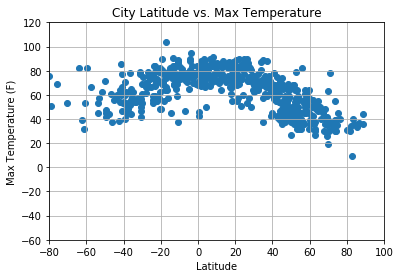

In [6]:
cities_pd['Max Temp'] = pd.to_numeric(cities_pd['Max Temp'], errors='coerce')

# Build a scatter plot for Latitude vs. Temperature
plt.scatter(cities_pd["Lat"], cities_pd["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("output_data/Latitude_MaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

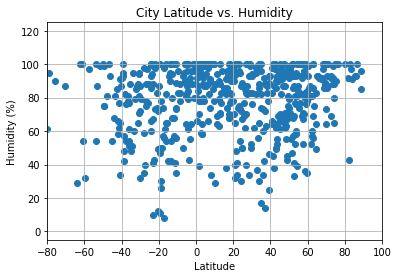

In [7]:
cities_pd['Humidity'] = pd.to_numeric(cities_pd['Humidity'], errors='coerce')

# Build a scatter plot for Latitude vs. Humidity
plt.scatter(cities_pd["Lat"], cities_pd["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("output_data/Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

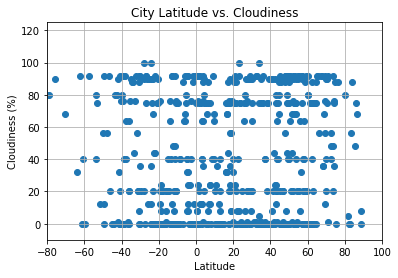

In [8]:
cities_pd['Cloudiness'] = pd.to_numeric(cities_pd['Cloudiness'], errors='coerce')

# Build a scatter plot for Latitude vs. Cloudiness
plt.scatter(cities_pd["Lat"], cities_pd["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("output_data/Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

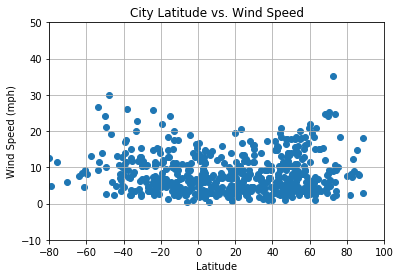

In [9]:
cities_pd['Wind Speed'] = pd.to_numeric(cities_pd['Wind Speed'], errors='coerce')

# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(cities_pd["Lat"], cities_pd["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("output_data/Latitude_WindSpeed.png")

# Show plot
plt.show()